# check spherical representation in ERA5
- we can download atmospheric output fields of ERA5 in spectral representation (sh = spherical harmonics)
- the data format however is hardly anywhere described
- we'll go and reverse engineer the format from different spectral cutoffs !

In [1]:
import numpy as np

datadir = '/gpfs/work/nonnenma/data/forecast_predictability/weatherbench/5_625deg/'
res_dir = '/gpfs/work/nonnenma/results/forecast_predictability/weatherbench/5_625deg/'

In [2]:
# downloading three different spectral resolutions of the same day parameter from MARS
# - level-type 'pressure level' pl (e.g. versus 'model level' ml)
# - temperature (parameter id '130')
# - stream: 'oper' for operational forecast
# - type analysis 'an' (e.g. versus 'forecast' fc)
# - two pressure levels: 500 and 850 hPa
# - whole month 2016-01-01 to 2016-01-31 (=744h)

"""
import cdsapi

c = cdsapi.Client()
fn = 'test_temperature_JAN_2016_MARS_T19'
c.retrieve('reanalysis-era5-complete', {
    'class': 'ea',
    'date': '2016-01-01/to/2016-01-31',
    'expver': '1',
    'levelist': '500/850',
    'levtype': 'pl',
    'param': '130.128',
    'stream': 'oper',
    'truncation' : '19',
    'time': '00:00:00/01:00:00/02:00:00/03:00:00/04:00:00/05:00:00/06:00:00/07:00:00/08:00:00/09:00:00/10:00:00/11:00:00/12:00:00/13:00:00/14:00:00/15:00:00/16:00:00/17:00:00/18:00:00/19:00:00/20:00:00/21:00:00/22:00:00/23:00:00',
    'type': 'an',
}, datadir + fn + '.grib')

c = cdsapi.Client()
fn = 'test_temperature_JAN_2016_MARS_T179'
c.retrieve('reanalysis-era5-complete', {
    'class': 'ea',
    'date': '2016-01-01/to/2016-01-31',
    'expver': '1',
    'levelist': '500/850',
    'levtype': 'pl',
    'param': '130.128',
    'stream': 'oper',
    'truncation' : '179',
    'time': '00:00:00/01:00:00/02:00:00/03:00:00/04:00:00/05:00:00/06:00:00/07:00:00/08:00:00/09:00:00/10:00:00/11:00:00/12:00:00/13:00:00/14:00:00/15:00:00/16:00:00/17:00:00/18:00:00/19:00:00/20:00:00/21:00:00/22:00:00/23:00:00',
    'type': 'an',
}, datadir + fn + '.grib')


c = cdsapi.Client()
fn = 'test_temperature_JAN_2016_MARS'
c.retrieve('reanalysis-era5-complete', {
    'class': 'ea',
    'date': '2016-01-01/to/2016-01-31',
    'expver': '1',
    'levelist': '500/850',
    'levtype': 'pl',
    'param': '130.128',
    'stream': 'oper',
    #'truncation' : '179', # no truncation gives T639, the inherent resolution of the IFS model !
    'time': '00:00:00/01:00:00/02:00:00/03:00:00/04:00:00/05:00:00/06:00:00/07:00:00/08:00:00/09:00:00/10:00:00/11:00:00/12:00:00/13:00:00/14:00:00/15:00:00/16:00:00/17:00:00/18:00:00/19:00:00/20:00:00/21:00:00/22:00:00/23:00:00',
    'type': 'an',
}, datadir + fn + '.grib')
"""

"\nimport cdsapi\n\nc = cdsapi.Client()\nfn = 'test_temperature_JAN_2016_MARS_T19'\nc.retrieve('reanalysis-era5-complete', {\n    'class': 'ea',\n    'date': '2016-01-01/to/2016-01-31',\n    'expver': '1',\n    'levelist': '500/850',\n    'levtype': 'pl',\n    'param': '130.128',\n    'stream': 'oper',\n    'truncation' : '19',\n    'time': '00:00:00/01:00:00/02:00:00/03:00:00/04:00:00/05:00:00/06:00:00/07:00:00/08:00:00/09:00:00/10:00:00/11:00:00/12:00:00/13:00:00/14:00:00/15:00:00/16:00:00/17:00:00/18:00:00/19:00:00/20:00:00/21:00:00/22:00:00/23:00:00',\n    'type': 'an',\n}, datadir + fn + '.grib')\n\nc = cdsapi.Client()\nfn = 'test_temperature_JAN_2016_MARS_T179'\nc.retrieve('reanalysis-era5-complete', {\n    'class': 'ea',\n    'date': '2016-01-01/to/2016-01-31',\n    'expver': '1',\n    'levelist': '500/850',\n    'levtype': 'pl',\n    'param': '130.128',\n    'stream': 'oper',\n    'truncation' : '179',\n    'time': '00:00:00/01:00:00/02:00:00/03:00:00/04:00:00/05:00:00/06:00:00

In [3]:
import xarray as xr

fn = 'test_temperature_JAN_2016_MARS_T19'
x19 = xr.open_dataset(datadir + fn + '.grib', engine='cfgrib')


fn = 'test_temperature_JAN_2016_MARS_T63'
x63 = xr.open_dataset(datadir + fn + '.grib', engine='cfgrib')


fn = 'test_temperature_JAN_2016_MARS_T179'
x179 = xr.open_dataset(datadir + fn + '.grib', engine='cfgrib')

fn = 'test_temperature_JAN_2016_MARS' # this is T639
x639 = xr.open_dataset(datadir + fn + '.grib', engine='cfgrib')

# let's check output shapes
x19.t.shape, x179.t.shape, x639.t.shape

Ignoring index file '/gpfs/work/nonnenma/data/forecast_predictability/weatherbench/5_625deg/test_temperature_JAN_2016_MARS_T19.grib.4cc40.idx' older than GRIB file
ecCodes provides no latitudes/longitudes for gridType='sh'
ecCodes provides no latitudes/longitudes for gridType='sh'
ecCodes provides no latitudes/longitudes for gridType='sh'
ecCodes provides no latitudes/longitudes for gridType='sh'


((744, 2, 420), (744, 2, 32580), (744, 2, 410240))

## figuring out the data format
- it is outputshape = (T+1) * (T+2), e.g. 420 = (19+1) * (19+2)
- the spherical coefficients are complex, hence there's probably two floats per spherical harmonic
- hypothesis: first half is REAL parts stored in an upper triangular (T+1)x(T+1) matrix for harmonics l=0,...,T, second half is COMPLEX parts

In [4]:
import matplotlib.pyplot as plt

def comp(T, values): # quick & dirty function to put values into (T+1)x(T+1) upper triangular matrix.
    
    T_ = T+1
    M = np.zeros((T_, T_))
    tri = np.ones((T_,T_))
    
    for i in range(T_):
        for j in range(T_):
            if j>i:
                tri[i,j] = 0
    idxi, idxj = np.where(tri.T) # get indices of upper triangular matrix

    for idx in range( int(T_*(T_+1) /2)):
        i, j = idxi[idx], idxj[idx]
        M[i,j] = values[idx] # assign values to location in upper triangular matrix
        #assert i >= j

    return M


In [5]:
# compute full upper triangular matrices, compare over regions that should overlap (up to T=19+1, 179+1)

plt.figure(figsize=(16,16))

# tenetative REAL parts of coefficients

Mr19r = comp(T=19, values=x19.t.values[0,0,:][0::2])
Mr179r = comp(T=179, values=x179.t.values[0,0,:][0::2])
Mr639r = comp(T=639, values=x639.t.values[0,0,:][0::2])

assert np.all(Mr19r[:20, :20]==Mr179r[:20, :20])
assert np.all(Mr19r[:20, :20]==Mr639r[:20, :20])
print(np.max(np.abs(Mr179r[:180, :180]-Mr639r[:180, :180])))



# tenetative COMPLEX parts of coefficients

Mr19i = comp(T=19, values=x19.t.values[0,0,:][1::2])
Mr179i = comp(T=179, values=x179.t.values[0,0,:][1::2])
Mr639i = comp(T=639, values=x639.t.values[0,0,:][1::2])

assert np.all(Mr19i[:20, :20]==Mr179i[:20, :20])
assert np.all(Mr19i[:20, :20]==Mr639i[:20, :20])
print(np.max(np.abs(Mr179i[:180, :180]-Mr639i[:180, :180])))


2.4512410163879395e-06
2.4469918571412563e-06


<Figure size 1152x1152 with 0 Axes>

<ipython-input-6-a03c9132a68d>:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(Mr639r[:180, :180])))
<ipython-input-6-a03c9132a68d>:14: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(Mr179r[:180, :180])))
<ipython-input-6-a03c9132a68d>:27: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(Mr639i[:180, :180])))
<ipython-input-6-a03c9132a68d>:31: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(Mr179i[:180, :180])))


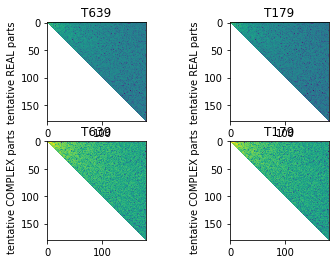

In [6]:
"""
plt.subplot(2,2,1)
plt.imshow(np.log(np.abs(Mr179[:20, :20])))
plt.title('T179')
plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(Mr19[:20, :20])))
plt.title('T19')
"""
plt.subplot(2,2,1)
plt.imshow(np.log(np.abs(Mr639r[:180, :180])))
plt.title('T639')
plt.ylabel('tentative REAL parts')
plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(Mr179r[:180, :180])))
plt.title('T179')
plt.ylabel('tentative REAL parts')

"""
plt.subplot(2,2,3)
plt.imshow(np.log(np.abs(Mr179[:20, :20])))
plt.title('T179')
plt.subplot(2,2,4)
plt.imshow(np.log(np.abs(Mr19[:20, :20])))
plt.title('T19')
"""
plt.subplot(2,2,3)
plt.imshow(np.log(np.abs(Mr639i[:180, :180])))
plt.title('T639')
plt.ylabel('tentative COMPLEX parts')
plt.subplot(2,2,4)
plt.imshow(np.log(np.abs(Mr179i[:180, :180])))
plt.title('T179')
plt.ylabel('tentative COMPLEX parts')

plt.show()

### track down differences between T179 and T639
- there's seeminlgy some small differences between T179 and T639, let's find out if they're negligible?

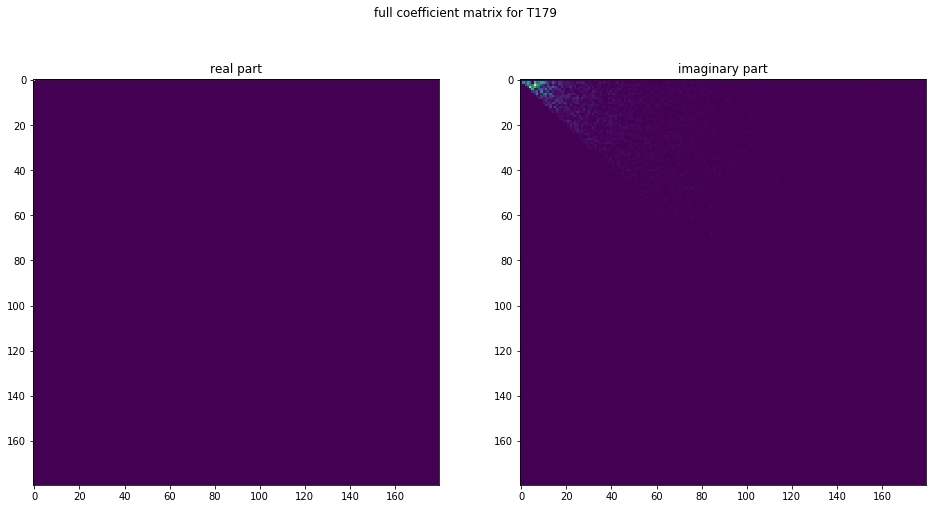

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow( np.abs(Mr179r) )
plt.title('real part')
plt.subplot(1,2,2)
plt.imshow( np.abs(Mr179i) )
plt.title('imaginary part')

plt.suptitle('full coefficient matrix for T179')
plt.show()

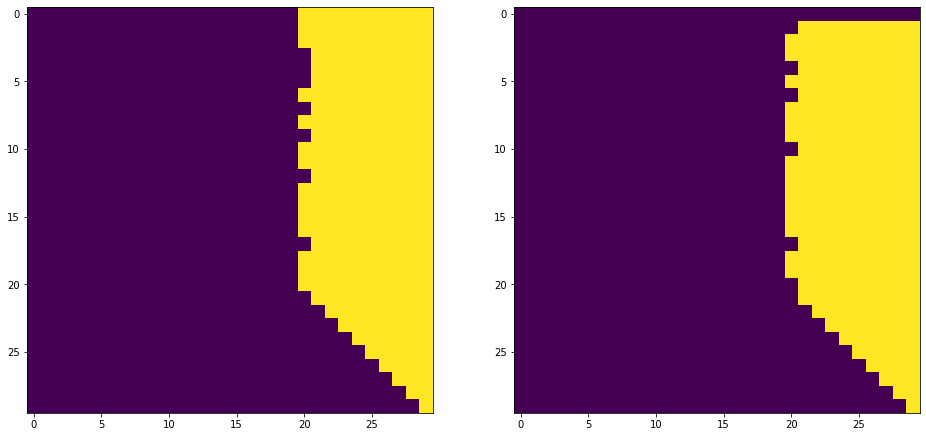

In [8]:
# looks like differences starts after the 20th harmonic !

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
x = np.zeros((180,180))
idxi, idxj = np.where( Mr179r[:180, :180] != Mr639r[:180, :180] )
for i in range(len(idxi)):
    x[idxi[i], idxj[i]] = 1
plt.imshow(x[:30, :30])

plt.subplot(1,2,2)
x = np.zeros((180,180))
idxi, idxj = np.where( Mr179i[:180, :180] != Mr639i[:180, :180] )
for i in range(len(idxi)):
    x[idxi[i], idxj[i]] = 1
plt.imshow(x[:30, :30])

plt.show()



<ipython-input-9-1b2d66ca0337>:6: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(  (np.abs(Mr179r[:180, :180] - Mr639r[:180, :180]) /  Mr639r[:180, :180]) > 0.01 )
<ipython-input-9-1b2d66ca0337>:6: RuntimeWarning: invalid value encountered in greater
  plt.imshow(  (np.abs(Mr179r[:180, :180] - Mr639r[:180, :180]) /  Mr639r[:180, :180]) > 0.01 )
<ipython-input-9-1b2d66ca0337>:9: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(  (np.abs(Mr179i[:180, :180] - Mr639i[:180, :180]) /  Mr639i[:180, :180]) > 0.01 )
<ipython-input-9-1b2d66ca0337>:9: RuntimeWarning: invalid value encountered in greater
  plt.imshow(  (np.abs(Mr179i[:180, :180] - Mr639i[:180, :180]) /  Mr639i[:180, :180]) > 0.01 )


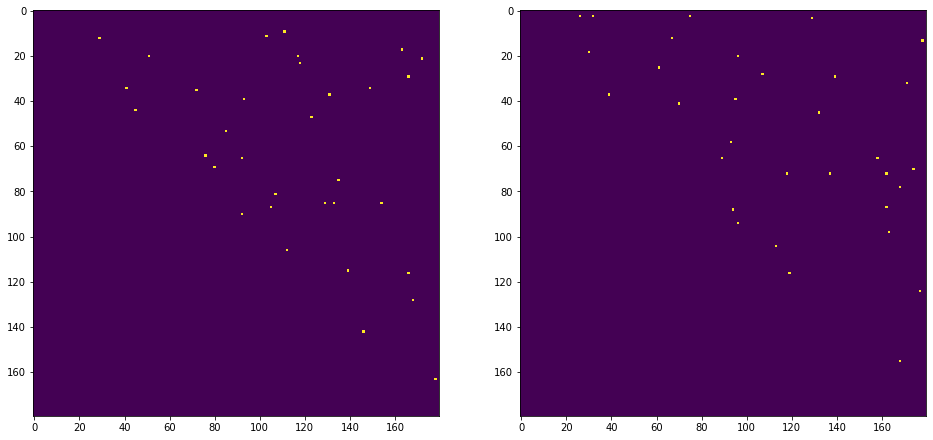

In [9]:
# which values differ by more than 1% of the T639 value ?

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(  (np.abs(Mr179r[:180, :180] - Mr639r[:180, :180]) /  Mr639r[:180, :180]) > 0.01 )

plt.subplot(1,2,2)
plt.imshow(  (np.abs(Mr179i[:180, :180] - Mr639i[:180, :180]) /  Mr639i[:180, :180]) > 0.01 )

plt.show()

# s2cnn corner
- understanding  and fixing the differences in encoding of spherical coefficients $\psi^m_l(t)$ between the s2cnn package and ERA5
- ERA5 only stores $\psi^m_l(t)$ only for positive $m$ (it is $\psi^{-m}_l(t) = 1/(-1)^m [\psi^m_l(t)]^*$). s2cnn expects coefficients for positive and negative $m$.
- ERA5 stores real and imaginary parts of coefficients intermittently, s2cnn has a 'complex' length-2 tensor axis 
- ERA5 arranges the coefficients for different $m,l$ as if read linearly from an upper triangular matrix, whereas s2cnn aranges them sorted by $l$ (i.e. as if reading along columns $M[l,:l]$, then rows $M[:l,l]$ of a matrix with all coefficients) 

In [10]:
# this function reads in spherical coefficients from ERA5 in 'values' and returns them ordered as for s2cnn 
def translate_idx(T):
    T_ = T+1

    # get indices of lower triangular matrix
    idx_in_i, idx_in_j = np.where(np.triu(np.ones((T_,T_)))) 

    # get indices to read out elements of full coefficient matrix
    idx_out_i, idx_out_j = np.zeros(T_**2,dtype=np.int), np.zeros(T_**2, dtype=np.int)
    for l in range(T_):
        # first read indices m = -l : -1 from lower triangle, then  m = 0 : l from upper
        idx_out_i[l**2 : l**2 + 2*l + 1] = np.asarray(np.concatenate([l*np.ones(l), np.arange(l+1)]), dtype=np.int)
        # note there's a shift on the column indices in lower triangle due to Mc[1:,-1] = M[1:, 1:] above
        idx_out_j[l**2 : l**2 + 2*l + 1] = np.asarray(np.concatenate([np.arange(l)[::-1], l**np.ones(l+1)]), dtype=np.int)
    
    return idx_in_i, idx_in_j, idx_out_i, idx_out_j
    
def cohmp(T, values, idcs=None): # quick & dirty function to put values into (T+1)x(T+1) upper triangular matrix.

    T_ = T+1
    idx_in_i, idx_in_j, idx_out_i, idx_out_j = translate_idx(T) if idcs is None else idcs
    
    # read stored spherical coefficients into upper triangular matrix 
    M = np.zeros((T_, T_, 2))
    for i in range(2):
        M[idx_in_i,idx_in_j,i] = values[i::2]

    # retrieve and store spherical coefficients for negative m
    ms = (np.arange(1,T_).reshape(-1,1)+np.array([0,1]))[:,None,:] 
    M[1:,:-1,:] += (M[1:, 1:,:] / (-1)**ms).transpose(1,0,2) # (-1)^m on the *columns* (i.e. along 'm' axis)
        
    # now read out elements of M in correct order ...
    out = np.vstack([M[idx_out_i, idx_out_j,i] for i in range(2)]).T.reshape(-1,1,2)

    return out

In [ ]:
from s2cnn.soft.s2_fft import s2_ifft
import torch

t = 736 # time index (in h)
lvl = 0 # level index (indexing [500, 850] hPa)

idcs63 = translate_idx(63)
ft = cohmp(T=63, values=x63.t.values[t,lvl,:], idcs=idcs63)

print('fourier transform shape: ', ft.shape)

x = s2_ifft(torch.tensor(ft, dtype=torch.float32), for_grad=False, b_out=None)
plt.figure(figsize=(16,8))
titles = ['real part', 'imaginary part']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(x[0,:,:,i])
    plt.colorbar()
    plt.title(titles[i])
plt.show()

### comparison images with weatherbench data

[ 0  0  0 ... 62 62 63] [ 0  1  2 ... 62 63 63]
fourier transform shape:  (4096, 1, 2)
[ 0  0  0 ... 62 62 63] [ 0  1  2 ... 62 63 63]
fourier transform shape:  (4096, 1, 2)


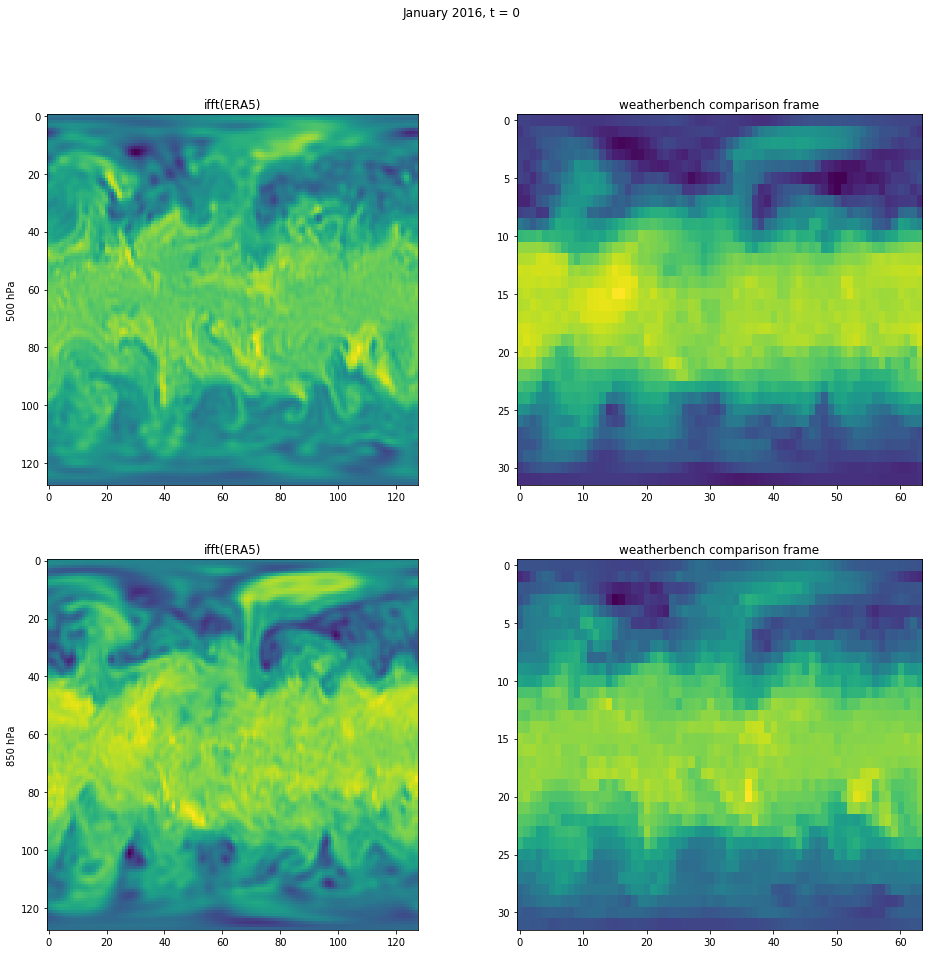

[ 0  0  0 ... 62 62 63] [ 0  1  2 ... 62 63 63]
fourier transform shape:  (4096, 1, 2)
[ 0  0  0 ... 62 62 63] [ 0  1  2 ... 62 63 63]
fourier transform shape:  (4096, 1, 2)


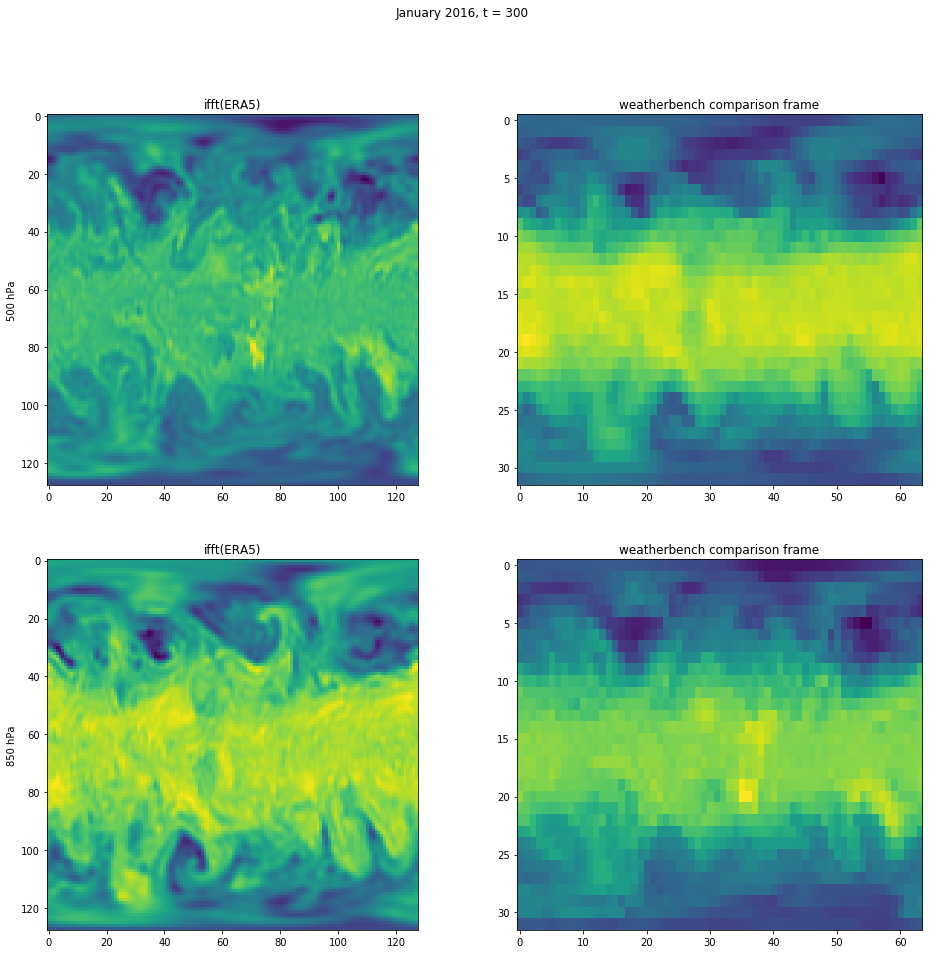

[ 0  0  0 ... 62 62 63] [ 0  1  2 ... 62 63 63]
fourier transform shape:  (4096, 1, 2)
[ 0  0  0 ... 62 62 63] [ 0  1  2 ... 62 63 63]
fourier transform shape:  (4096, 1, 2)


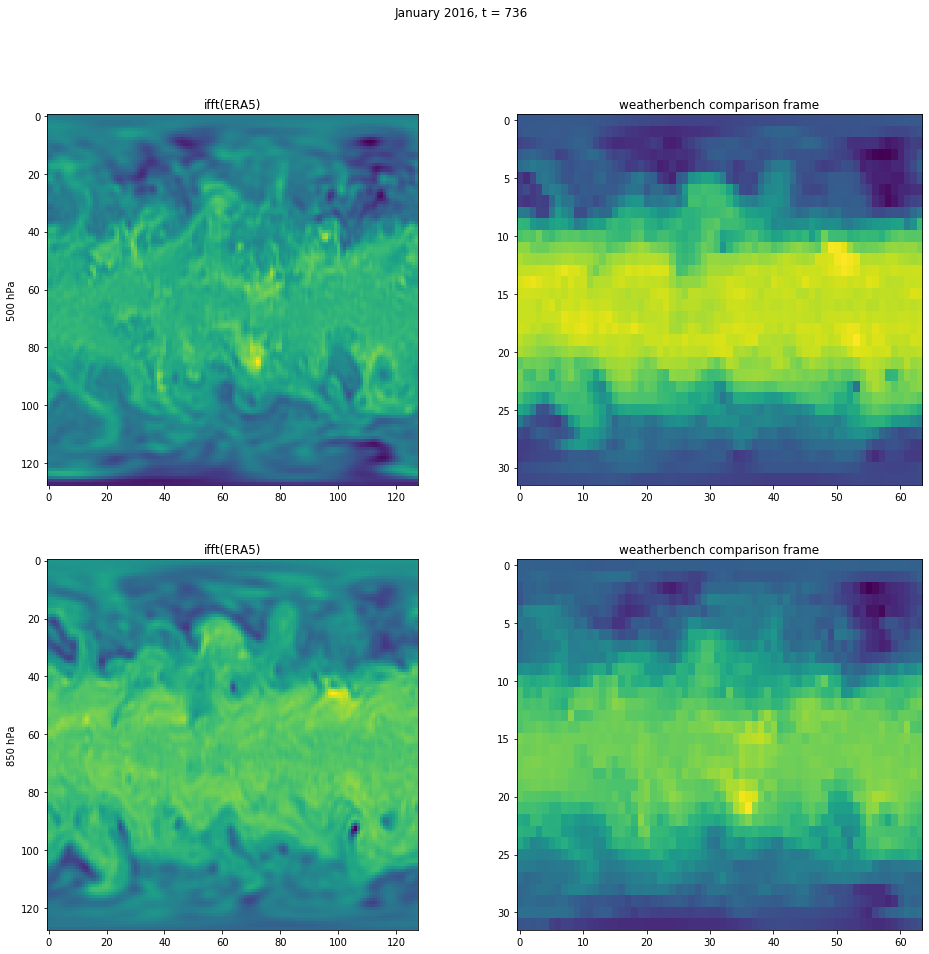

In [13]:
from s2cnn.soft.s2_fft import s2_ifft

for t in [0, 300, 736]:
    plt.figure(figsize=(16,15))
    for lvl in range(2):

        ft = cohmp(T=63, values=x63.t.values[t,lvl,:], idcs=idcs63)
        print('fourier transform shape: ', ft.shape)

        x = s2_ifft(torch.tensor(ft, dtype=torch.float32), for_grad=False, b_out=None)
        titles = ['ifft(ERA5)', 'imaginary part']
        for i in range(1):
            plt.subplot(2,2,i+1 + 2*lvl)
            plt.imshow(x[0,:,:,i])
            plt.title(titles[i])
            #plt.colorbar()
        if lvl == 0:
            plt.ylabel('500 hPa')
        else:
            plt.ylabel('850 hPa')

        datadir = '/gpfs/work/nonnenma/data/forecast_predictability/weatherbench/5_625deg/'
        var_dict = {'temperature': ('t', [500, 850])}
        x = xr.merge( # lazy: use xr.merge to get hour counts per year from chunk size
        [xr.open_mfdataset(f'{datadir}/{var}/*2016*.nc', combine='by_coords')
         for var in var_dict.keys()],
        fill_value=0  # For the 'tisr' NaNs
        )
        x = x.sel(level=[500, 850]).t.values
        plt.subplot(2,2,2 + 2*lvl)
        plt.imshow(np.flipud(np.hstack([x[t,lvl,:,32:],x[t,lvl,:,:32]])), aspect='auto')
        #plt.colorbar()
        plt.title('weatherbench comparison frame')
        plt.suptitle(f'January 2016, t = {t}')
    plt.show()

# debug

In [ ]:
"""
import cdsapi

c = cdsapi.Client()

years = ['1979', '1980', '1981', '1982', '1983', '1984',
         '1985', '1986', '1987', '1988', '1989', '1990',
         '1991', '1992', '1993', '1994', '1995', '1996',
         '1997', '1998', '1999', '2000', '2001', '2002',
         '2003', '2004', '2005', '2006', '2007', '2008',
         '2009', '2010', '2011', '2012', '2013', '2014',
         '2015', '2016', '2017', '2018'
        ]

variables = [
            'geopotential', 'potential_vorticity', 'relative_humidity',
            'specific_humidity', 'temperature', 'u_component_of_wind',
            'v_component_of_wind', 'vorticity',
        ]

months = [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ]

days = [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ]

fn = 'test_temperature_1979'
years_selected = [ years[0] ]
variables_selected = [ variables[4] ]
months_selected = [ months[0] ]
days_selected = [ days[0] ]
request = {
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': variables_selected, 
        'pressure_level': [
            '1', '10', '100',
            '200', '300', '400',
            '500', '600', '700',
            '850', '1000',
        ],
        'year': years_selected,
        'month': months_selected,
        'day': days_selected,
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
    }

c.retrieve(
    'reanalysis-era5-pressure-levels',
    request,
    datadir + fn + '.grib')

"""